In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
from sklearn import mixture

In [7]:
#产生数据的函数
def create_data(centers,num = 100 ,std = 0.7):
    x, labels_true = make_blobs(n_samples=num,centers=centers,cluster_std = std)
    return x,labels_true
#centers聚类的中心店组成的数组 num样本数
#返回值是一个元祖，第一个元素是样本点，第二个是样本点的真实簇分类标记

In [26]:
#观察样本点
def plot_data(*data):
    x,labels_true = data
    labels = np.unique(labels_true)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colors = 'rgbyckm'
    for i,label in enumerate(labels):
        position = labels_true == label
        ax.scatter(x[position,0],x[position,1],label = 'cluster %d'%label,color = colors[i%len(colors)])
    ax.legend(loc = 'best',framealpha = 0.5)
    ax.set_xlabel('x[0]')
    ax.set_ylabel('x[1]')
    plt.show()

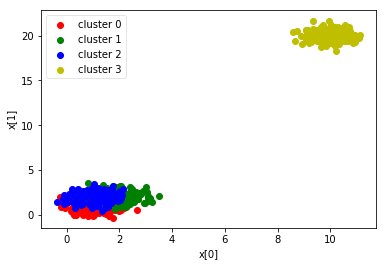

In [27]:
x,label_true = create_data([[1,1],[2,2],[1,2],[10,20]],1000,0.5)
plot_data(x,label_true)

## 库实现K均值聚类

In [30]:
def test_Kmeans(*data):
    x,label_true = data
    clst = cluster.KMeans()
    clst.fit(x)
    predicted_labels = clst.predict(x)
    print('ARI: %s'%adjusted_rand_score(label_true,predicted_labels))
    print('Sum center distance %s'%clst.inertia_)

In [32]:
x,label_true = create_data([[1,1],[2,2],[1,2],[10,20]],1000,0.5)#越大越好
test_Kmeans(x,label_true)

ARI: 0.3703482813747729
Sum center distance 228.89428704443952


### n_clusters制定分类簇的数量
### init表示初始均值向量的策略，k-means++表示选择初始均值向量相互之间比较远，random表示随机选
### n_init运算次数
### max_iter指定单轮k均值算法中迭代次数
### tol表示算法收敛的阀值

## 考察簇数量影响

In [37]:
def test_Kmeans_nclusters(*data):
    x,label_true = data
    nums = range(1,50)
    ARIs = []
    distance = []
    for num in nums:
        clst = cluster.KMeans(n_clusters=num)
        clst.fit(x)
        predicted_labels = clst.predict(x)
        ARIs.append(adjusted_rand_score(label_true,predicted_labels))
        distance.append(clst.inertia_)
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs,marker = '+')
    ax.set_xlabel('n_clusters')
    ax.set_ylabel('ARI')
    ax = fig.add_subplot(1,2,2)
    ax.plot(nums,distance,marker = 'o')
    ax.set_xlabel('n_clusters')
    ax.set_ylabel('KMeans')
    plt.show()
    

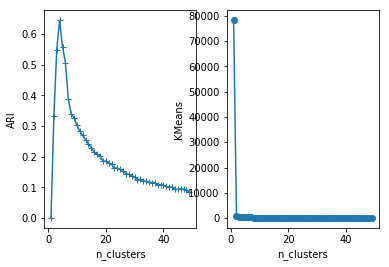

In [38]:
x,label_true = create_data([[1,1],[2,2],[1,2],[10,20]],1000,0.5)#越大越好
test_Kmeans_nclusters(x,label_true)